In [1]:
# math imports
import random
import scipy.stats as stats
import numpy as np
# plotting imports
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Exercise: Analyzing a Stochastic Spaghetti Knotting Problem

The problem is defined as follows:

You have a plate with $n$ pieces of spaghetti. Each spaghetto has two ends. You randomly pick two ends from the plate and knot them together. You continue this process until all ends are knotted.
If we pick the ends of the same spaghetto or of one chain of knotted spaghetti, we create a loop by knotting them together.

We are interested in the number and the maximal length of these loops.

## Example with $n=3$

Consider the case where $n=3$, meaning there are $3$ spaghetti, each with $2$ ends, resulting in a total of $6$ ends.
A *possible* outcome could be:

1. We pick the two ends of our first spaghetto, knot them together and have a 1-spaghetto-loop.
2. Then we pick one end of spaghetto two and one end of spaghetto three. Knotting them together yields a longs spaghetto but no new loop.
3. Now our pick is non random since we only have two ends left to choose and we create one last loop of length two.

The possible outcomes of this process can be different configurations of loops formed by the knotted ends. 
Indeed it can result in $1$ loop of length $3$, $2$ loops of length $1$ resp $2$ or $3$ loops of length $1$.

## Note:

This algorithm will end after exactly $n$ knots, since we have $2n$ ends and each knot reduces the number of ends by $2$.

## First Exercise: Simulate the Number of Loops

We look at how many loops this algorithm yields.
This can be viewed as a discrete random variable with support $[1,...,n]$.
In this exercise, we want to simulate this random variable.

Before implementing think about the steps and the randomness in each step.
How can you implement this problem?

**Hint:** Try to determin the probability that the $(k+1)$-th knot yields a new loop.
These experiments are indeed independent (because they are only dependent on the number of ends which are left) and since they are binary also bernoulli distributed.

**Add-on:** Please write DOC-strings and comment your Code.

In [ ]:
def simulate_number_of_loops(n):
    """
    #### Write DOC Strings ####
    """
    n_l = 0
    #### YOUR CODE HERE ####
    #### END YOUR CODE ####
    return n_l

# Example usage
n = 3
n_l = simulate_number_of_loops(n)
print("Loop counts:", n_l)
loop_counts = [simulate_number_of_loops(n) for _ in range(100)]
unique, counts = np.unique(loop_counts, return_counts=True)
loop_count_frequencies = dict(zip(unique, counts))
print("Loop count frequencies:", loop_count_frequencies)

Loop counts: 1
Loop count frequencies: {np.int64(1): np.int64(50), np.int64(2): np.int64(40), np.int64(3): np.int64(10)}


### Approximating the mean

We now want to approximate the expectation using the empirical mean of iid trials.

**Fun fact:** The expectation can be explicitely calculated using prove by induction.

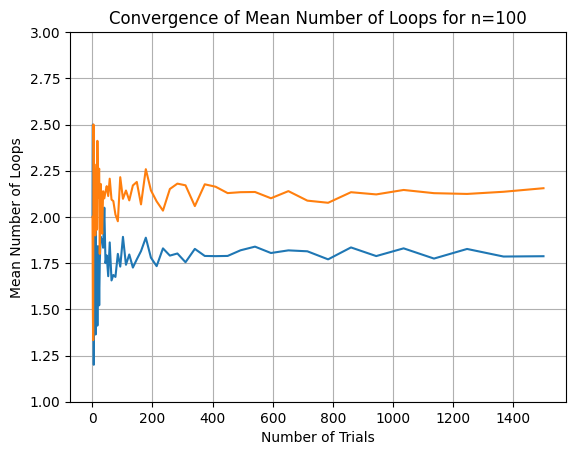

In [3]:
# Number of trials
num_trials = 1500
num_steps = 80
n1 = 5
n2 = 10
# Simulate the number of loops for increasing number of trials
trials = np.unique(np.logspace(0, np.log10(num_trials), num=num_steps, dtype=int))
mean_for_n1 = [np.mean([simulate_number_of_loops(n1) for _ in range(i)]) for i in trials]
mean_for_n2 = [np.mean([simulate_number_of_loops(n2) for _ in range(i)]) for i in trials]

# Plot the convergence of the mean number of loops
plt.plot(trials, mean_for_n1)
plt.plot(trials, mean_for_n2)
plt.xlabel('Number of Trials')
plt.ylabel('Mean Number of Loops')
plt.ylim([1, 3])
plt.title('Convergence of Mean Number of Loops for n=100')
plt.grid(True)

plt.show()

## Second Exercise: Track the Length of Each Resulting Loop

In this exercise, we will implement a function that keeps track of the length of each resulting loop when knotting the ends of spaghetti pieces. This function will simulate the knotting process and return a list of loop lengths formed during the process.

**Hint (One possible way to implement this...):** 
1. Keep track of each spaghetti piece's length in a separate list.
    * When two separate spaghetti chains are knotted together, add their lengths, update this length in the spaghetti list and delete one of the knotted spaghetti from the list.
    * When a loop is formed, add its length to the list of loop lengths and delete the spaghetti.
2. To simulate a draw of two spaghetti ends, you may think of drawing without replacement from an urn where each index of the spaghetti list is placed exactly twice.

In [ ]:
def simulate_spaghetti_knotting(n):
    """
    #### Write DOC Strings ####
    """
    # Track length of the loops
    loops = []
    #### YOUR CODE HERE ####
    #### END YOUR CODE ####
    return loops

# Example usage
n = 3
loops = simulate_spaghetti_knotting(n)
print("Loop lengths:", loops)
print("Loop counts:", len(loops))

Loop lengths: [np.float64(3.0)]
Loop counts: 1


### Approximating the mean

We approximate the expectation of the size of the longest chain using the empirical mean of iid trials.

**Fun fact:** This expectation is much harder to explicitily evaluate.

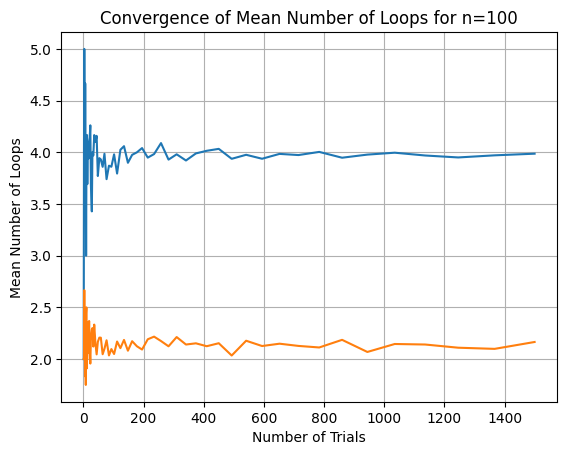

In [5]:
# Number of trials
num_trials = 1500
num_steps = 80
n1 = 5
n2 = 10
# Simulate the number of loops for increasing number of trials
trials = np.unique(np.logspace(0, np.log10(num_trials), num=num_steps, dtype=int))
max_loop_lengths_n1 = [np.mean([max(simulate_spaghetti_knotting(n1)) for _ in range(i)]) for i in trials]
max_loop_lengths_n2 = [np.mean([simulate_number_of_loops(n2) for _ in range(i)]) for i in trials]

# Plot the convergence of the mean number of loops
plt.plot(trials, max_loop_lengths_n1)
plt.plot(trials, max_loop_lengths_n2)
plt.xlabel('Number of Trials')
plt.ylabel('Mean Number of Loops')
#plt.ylim([1, 3])
plt.title('Convergence of Mean Number of Loops for n=100')
plt.grid(True)

plt.show()

### Plotting the empirical distribution

Since it is hard to calculate the mean of the size of the longest loop, it is even harder to determin the actual distribution this random variable follows.
Hence it makes sense to look at the empirical distribution for increasing trial number and hope that it converges to the true distribution of this random variable.

In [6]:
def update_plot(num_trials, n=10):
    """
    Updates the plot showing the relative frequencies of the maximum loop lengths 
    obtained from simulating spaghetti knotting.
    Parameters:
    num_trials (int): The number of trials to run the simulation.
    Returns:
    None
    """
    num_trials = int(num_trials)
    max_loop_lengths = [max(simulate_spaghetti_knotting(n)) for _ in range(num_trials)]
    unique_max, counts_max = np.unique(max_loop_lengths, return_counts=True)
    relative_frequencies = counts_max / num_trials
    

    plt.bar(unique_max, relative_frequencies)
    plt.xlim([0, n+1])
    plt.ylim([0, .5])
    plt.xlabel('Maximum Loop Length')
    plt.ylabel('Relative Frequency')
    plt.title('Relative Frequencies of the Maximum Loop Length')
    plt.grid(True)
    plt.show()


slider = widgets.FloatLogSlider(value=1024, base=2, min=0, max=15, step=1, description='# samples:')
widgets.interact(update_plot, num_trials=slider, n=(1,10))

interactive(children=(FloatLogSlider(value=1024.0, base=2.0, description='# samples:', max=15.0, step=1.0), In…

<function __main__.update_plot(num_trials, n=10)>

## Conclusion
- We observed the convergence of the mean number of loops with an increasing number of trials.
- Additionally the size of the largest loop convergences in mean.
- We plotted the empirical distribution of the lengths of the maximal loop.

These simulations provide insights into the behavior of random knotting processes and can be extended to study more complex stochastic systems.
The visualizations and statistical analyses help in understanding the underlying patterns and distributions in such random processes.
Specifically the distribution of the size of the biggest loop is not easy to explicitily determin, but we were able to get an intuition on how this random variable behaves using the empirical distribution.